In [2]:
from DataPreprocessing.python.Data import *

import pandas as pd
import numpy as np

# We'll use this later
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# This is new, it will allow us to interact with
# 3d plots in the notebook
from mpl_toolkits.mplot3d import Axes3D


## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [3]:
rootData = Data("/Users/czkaiweb/Research/ErdosBootCamp/Project/ProjectData/Root_Insurance_data.csv")
rootData.loadData()
data_copy = rootData.getDataCopy()

set_of_combinations = set()
for i in data_copy.values:
    set_of_combinations.add(tuple(i[:4]))

rootData.groupByFeature(featureSet=set_of_combinations, columns=["Currently Insured","Number of Vehicles","Number of Drivers","Marital Status"], name="GroupIndex")
rootData.splitData(fraction=[0.8,0,0.2],random_seed=42)

data_train = rootData.getTrainDataCopy()

In [4]:
#data_train["GroupIndex"]
data_train.head()

,Currently Insured,Number of Vehicles,Number of Drivers,Marital Status,bid,rank,click,policies_sold,GroupIndex
6252,unknown,1,1,S,10.0,1,True,1,25.0
4684,unknown,3,2,M,10.0,3,False,0,34.0
1731,Y,2,2,M,10.0,4,False,0,18.0
4742,Y,3,1,S,10.0,4,False,0,21.0
4521,Y,3,1,M,10.0,4,False,0,20.0


In [5]:
def fillRanks(x,nBins,low,high):
    bins = [ (high-low)/nBins*i+low for i in range(nBins + 1)]
    binned = pd.cut(x,bins)
    filledBins = binned.value_counts()
    filledBins = binned.value_counts()[filledBins.index.sort_values()]
    return filledBins

def fillClickedRanks(x,nBins,low,high):
    bins = [ (high-low)/nBins*i+low for i in range(nBins + 1)]
    x_clicked = x[x["click"] == True]
    binned = pd.cut(x_clicked["rank"],bins)
    filledBins = binned.value_counts()
    filledBins = binned.value_counts()[filledBins.index.sort_values()]
    return filledBins

def fillSoldRanks(x,nBins,low,high):
    bins = [ (high-low)/nBins*i+low for i in range(nBins + 1)]
    x_sold = x[x["policies_sold"] == True]
    binned = pd.cut(x_sold["rank"],bins)
    filledBins = binned.value_counts()
    filledBins = binned.value_counts()[filledBins.index.sort_values()]
    return filledBins 
    

rankVecs_grouped = data_train.groupby(['Currently Insured','Number of Vehicles','Number of Drivers','Marital Status'])
maps_group = pd.DataFrame(columns=['map_rank2click','map_click2decision'])
for index, group in rankVecs_grouped:
    rankVec_grouped = fillRanks(group['rank'],5,0.5,5.5)
    clickVec_grouped = fillClickedRanks(group[['rank','click']],5,0.5,5.5)
    soldVec_grouped = fillSoldRanks(group[['rank','click','policies_sold']],5,0.5,5.5)
    map_group=pd.DataFrame([[clickVec_grouped/rankVec_grouped,soldVec_grouped/clickVec_grouped]],index=[index],columns=['map_rank2click','map_click2decision'])
    maps_group = pd.concat([maps_group,map_group])




In [6]:
maps_group.head(5)


,map_rank2click,map_click2decision
"(N, 1, 1, M)","(0.5, 1.5] NaN (1.5, 2.5] 0.179487 ...","(0.5, 1.5] NaN (1.5, 2.5] 0.714286 ..."
"(N, 1, 1, S)","(0.5, 1.5] NaN (1.5, 2.5] 0.428571 ...","(0.5, 1.5] NaN (1.5, 2.5] 0.666667 ..."
"(N, 1, 2, M)","(0.5, 1.5] 0.469388 (1.5, 2.5] 0.290323 ...","(0.5, 1.5] 0.391304 (1.5, 2.5] 0.277778 ..."
"(N, 1, 2, S)","(0.5, 1.5] 0.561404 (1.5, 2.5] 0.246154 ...","(0.5, 1.5] 0.312500 (1.5, 2.5] 0.500000 ..."
"(N, 2, 1, M)","(0.5, 1.5] NaN (1.5, 2.5] NaN ...","(0.5, 1.5] NaN (1.5, 2.5] NaN ..."


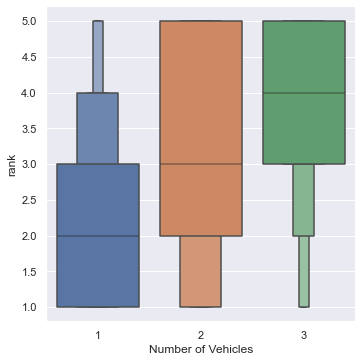

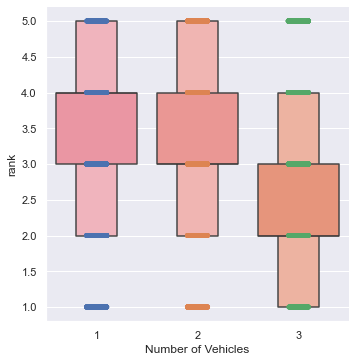

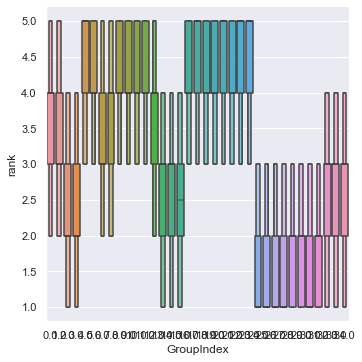

In [7]:
sns.set()

sns.catplot(y="rank", x="Number of Vehicles", kind="boxen", data=data_train)
sns.catplot(y="rank", x="GroupIndex", kind="boxen", data=data_train)
sns.stripplot(y="rank",x="Number of Vehicles", data=data_train)



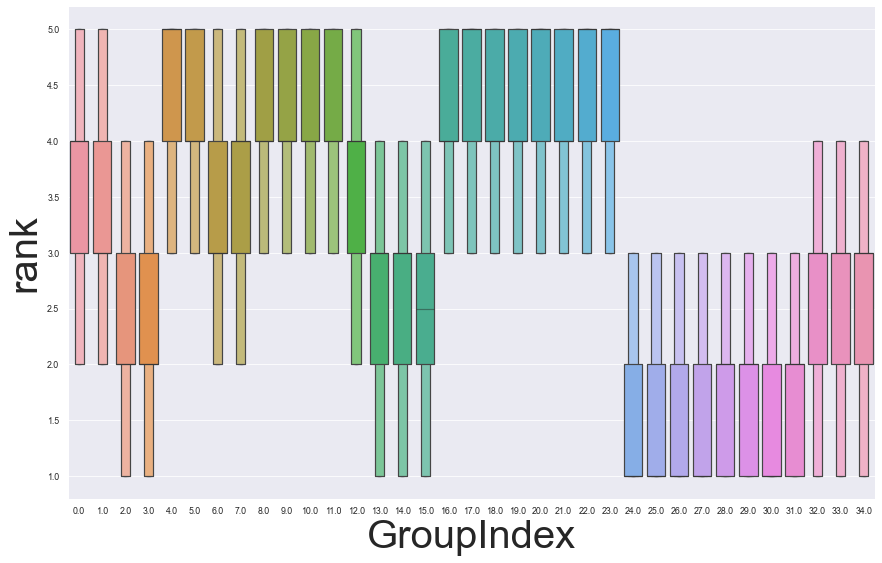

In [21]:
sns.set_context("paper", rc={"font.size":40,"axes.titlesize":40,"axes.labelsize":40})   
sns.catplot(y="rank",x="GroupIndex", kind="boxen", data=data_train,height=8.27, aspect=12.7/8.27)


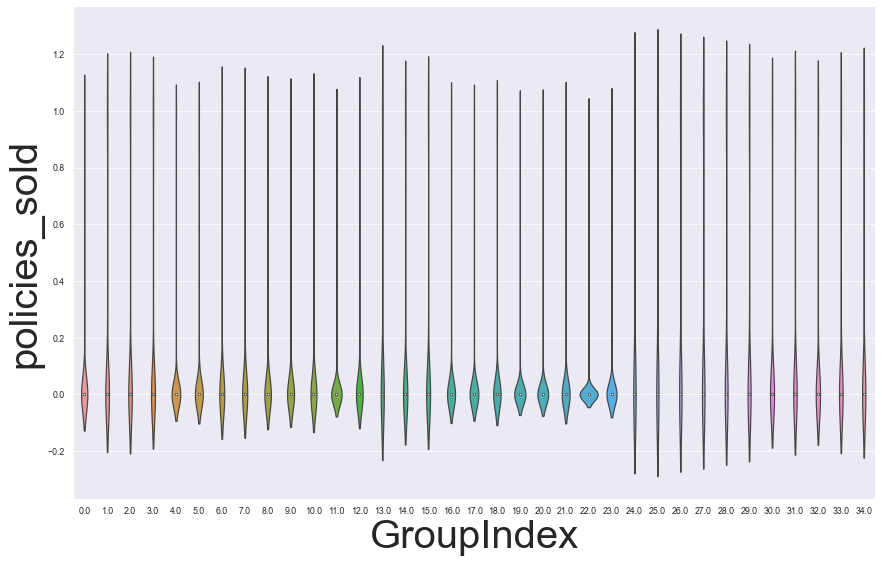

In [28]:
sns.catplot(y="policies_sold",x="GroupIndex", kind="violin",data=data_train,height=8.27, aspect=12.7/8.27)